In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import re
import pandas as pd

# Initialize an empty list to store dataframes
df_list = []

# Regular expression to match the filenames and extract IDs
pattern = re.compile(r"curvature_ellipsoid_ratio_3.0_from_(\d+)_to_(\d+)\.csv")

# Iterate over all files in the directory (replace '.' with your directory path)
for filename in os.listdir('.'):
    match = pattern.match(filename)
    if match:
        # Extract the range of ids from the filename
        start_id, end_id = map(int, match.groups())

        # Read the csv file into a DataFrame
        df = pd.read_csv(filename, header=None)
        
        # Create a new column for the ids
        df['id'] = range(start_id, end_id)
        
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(df_list, ignore_index=True)
final_df = final_df.set_index('id').sort_index()
# Save the final DataFrame to a new csv file
# final_df.to_csv('curvature_ellipsoid_ratio_4_combined.csv', index=False)
np.savetxt("curvature_ellipsoid_ratio_4_combined.csv", final_df.values)
# Show the head of the final DataFrame as a sample

In [3]:
# final_df = pd.DataFrame(np.loadtxt("results/ellipsoid/curvature_ellipsoid_ratio_4_combined.csv", delimiter=','))

In [4]:
ellipsoid = np.loadtxt('ellipsoid_cloud_ratio_4.csv', delimiter=',')

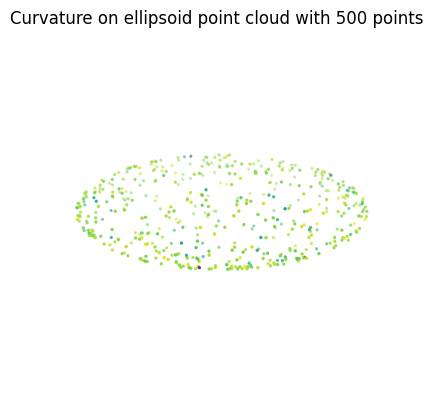

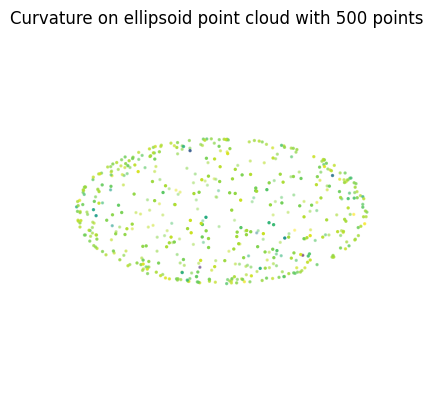

In [5]:
num_eval = 500
v = final_df.values[:num_eval, :]
# Visualize the point cloud

# # Find the minimum and maximum values across all axes
# min_val = ellipsoid[:num_eval].min()
# max_val = ellipsoid[:num_eval].max()

# # Set the same limits for all axes to ensure equal unit lengths
# ax.set_xlim([min_val, max_val])
# ax.set_ylim([min_val, max_val])
# ax.set_zlim([min_val, max_val])
# # Add axis labels
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')

# cc = - v
cc =  -v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc)
# Add a colorbar
# cbar = plt.colorbar(scatter)
ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_birdview_ratio_4.png", dpi = 300)

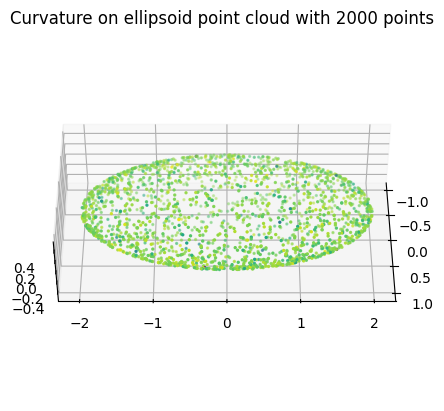

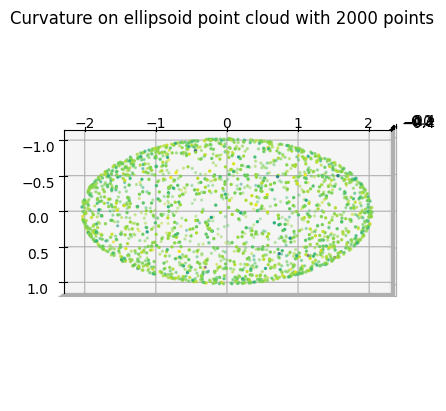

In [13]:
num_eval = 2000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
cc = - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_birdview_ratio_4.png", dpi = 300)

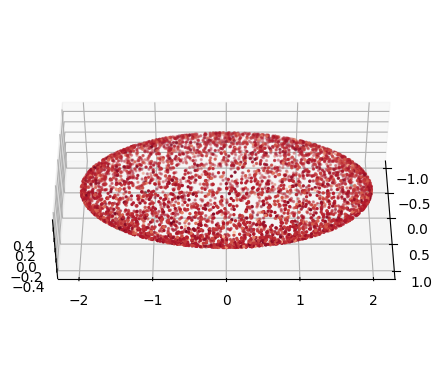

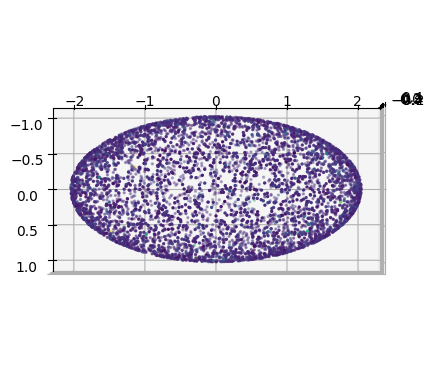

In [14]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
# cc = - v
cc = v

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc, cmap='RdGy')
# ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=2, c = cc)
# ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_birdview_ratio_4.png", dpi = 300)

(array([1.486e+03, 3.127e+03, 2.740e+02, 2.900e+01, 2.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00769247, 1.01063081, 1.01356916, 1.01650751, 1.01944586,
        1.0223842 , 1.02532255, 1.0282609 , 1.03119925, 1.03413759,
        1.03707594]),
 <BarContainer object of 10 artists>)

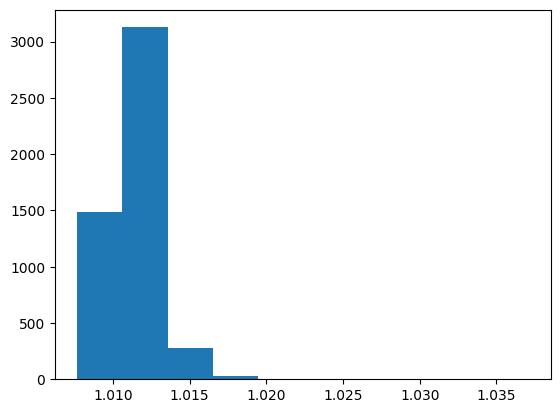

In [8]:
plt.hist(v)

0    4932
dtype: int64
4891


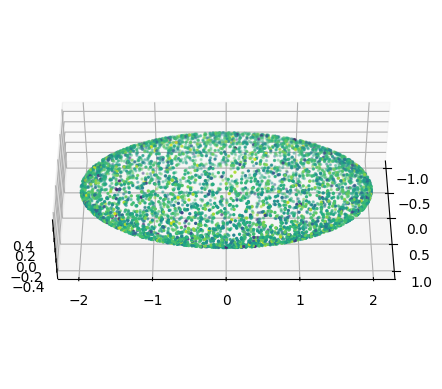

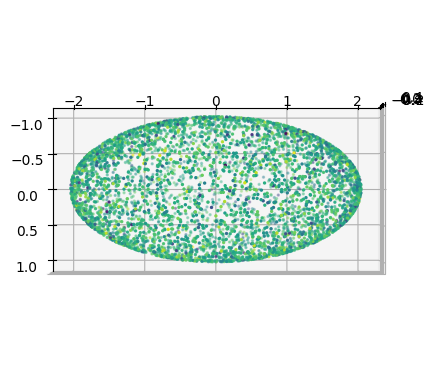

In [29]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
# cc = v
print((1-final_df.isna()).sum())
# valid_ids = (v < 1.017).flatten()
valid_ids = (v < 1.017).flatten()
print(valid_ids.sum())
cc = - v[valid_ids]

# cc = (cc - cc.mean())/cc.std()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[valid_ids, 0], ellipsoid[valid_ids, 1], ellipsoid[valid_ids, 2], s=2, c = cc)#, cmap='plasma')
# ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[valid_ids, 0], ellipsoid[valid_ids, 1], ellipsoid[valid_ids, 2], s=2, c = cc)#, cmap='inferno')
# ax.set_title(f"Curvature on ellipsoid point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("ellipsoid_birdview_ratio_4.png", dpi = 300)

In [10]:
valid_ids.shape

(5000,)

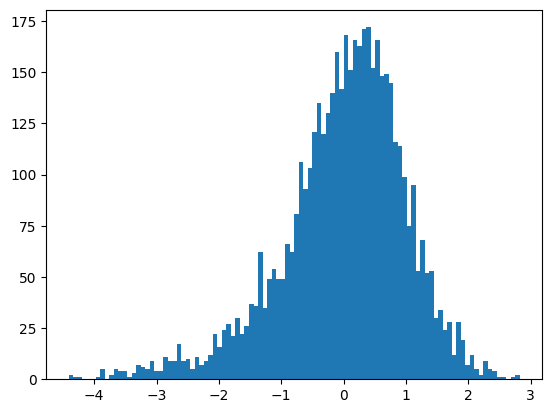

In [28]:
plt.hist(cc, 100)
plt.show()